In [130]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>

In [131]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(style="ticks")

np.random.seed(7)

pd.options.display.max_rows = 100

In [132]:
train_df = pd.read_csv('hw5/datasets/data_fraud/X_train.csv').sort_index(axis=1)
label = pd.read_csv('hw5/datasets/data_fraud/Y_train.csv')
data_df = pd.concat([train_df, label], axis=1)

In [133]:
test_df = pd.read_csv('hw5/datasets/data_fraud/X_test.csv').sort_index(axis=1)
test_df.head()

,amount,customerAttr_a,customerAttr_b,field_a,field_b,field_c,field_d,flag_a,flag_b,flag_c,flag_d,flag_e,hour_a,hour_b,indicator_a,indicator_b,state,total,zip
0,25.90,1234567890197185,redjhmbdzmbzg1226@sbcglobal.net,3,0,2525,8,0,1,0,0,2,0,0,0,0,CA,25.90,945
1,25.90,1234567890197186,puwelzumjynty@aol.com,0,0,3393,17,0,1,1,0,1,0,0,0,0,CA,25.90,940
2,49.95,1234567890197187,quhdenwubwydu@earthlink.net,3,1,-737,26,0,1,0,0,1,0,0,0,0,CA,49.95,910
3,59.40,1234567890197188,lrutfoamzuxjr00@comcast.net,3,0,-2799,23,0,1,0,0,1,0,0,0,0,WA,59.40,986
4,34.95,1234567890197189,zotfchxiqqdml4035@comcast.net,2,0,900,10,1,1,1,0,1,0,0,0,0,OR,34.95,973


In [134]:
train_df.describe()

,amount,customerAttr_a,field_a,field_b,field_c,field_d,flag_a,flag_b,flag_c,flag_d,flag_e,hour_a,hour_b,indicator_a,indicator_b,total,zip
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,26.976580,1.234568e+15,2.368270,0.405380,368.796390,15.026270,0.419710,0.556400,0.391400,0.013730,16.03735,14.016050,14.030530,0.113370,0.017850,26.976580,544.307340
std,14.595018,2.140113e+04,0.998768,0.490968,4151.204585,6.450308,0.493514,0.496811,0.488066,0.116368,191.19456,5.415115,5.409443,0.317046,0.132407,14.595018,317.286574
min,0.000000,1.234568e+15,0.000000,0.000000,-26803.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,12.950000,1.234568e+15,2.000000,0.000000,-2260.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.00000,11.000000,11.000000,0.000000,0.000000,12.950000,279.000000
50%,25.900000,1.234568e+15,3.000000,0.000000,1093.000000,15.000000,0.000000,1.000000,0.000000,0.000000,1.00000,14.000000,14.000000,0.000000,0.000000,25.900000,535.000000
75%,38.850000,1.234568e+15,3.000000,1.000000,3517.250000,20.000000,1.000000,1.000000,1.000000,0.000000,1.00000,18.000000,18.000000,0.000000,0.000000,38.850000,891.000000
max,59.950000,1.234568e+15,4.000000,1.000000,8169.000000,44.000000,1.000000,1.000000,1.000000,1.000000,3278.00000,23.000000,23.000000,1.000000,1.000000,59.950000,999.000000


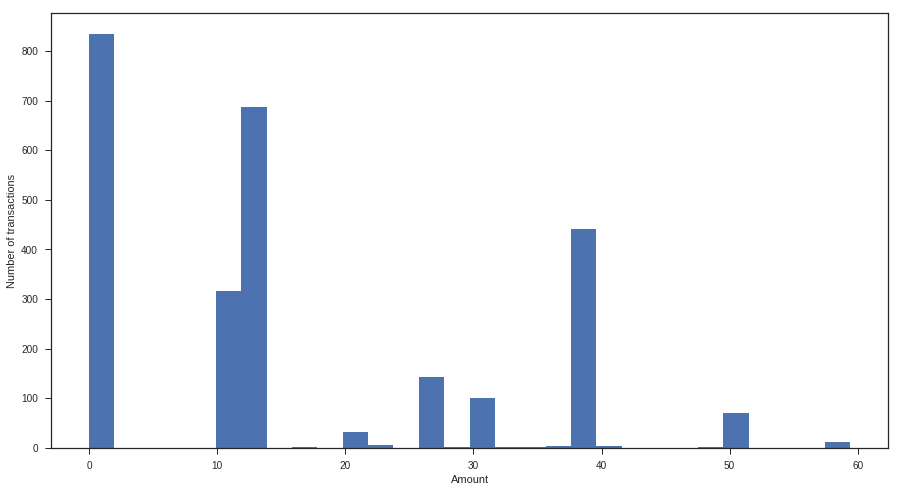

In [135]:
figure = plt.figure(figsize=(15, 8))
plt.hist(data_df[data_df['fraud'] == 1]['amount'], bins=30)
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.legend()

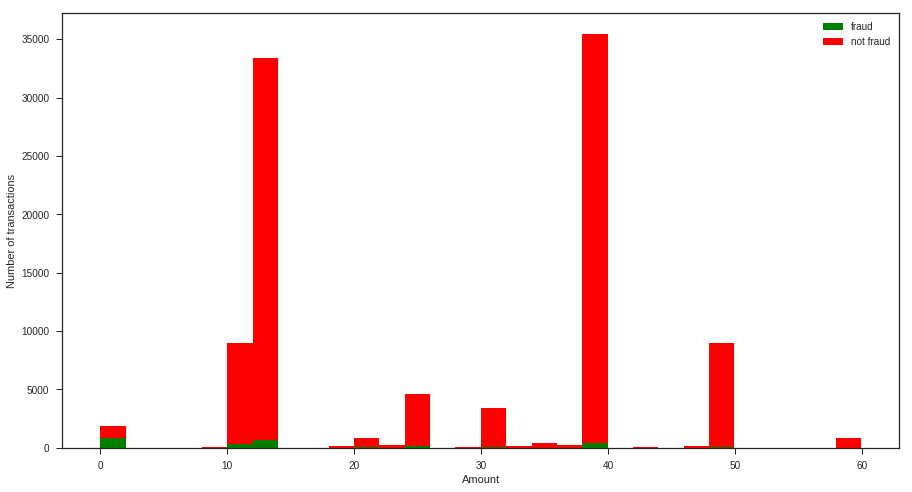

In [136]:
figure = plt.figure(figsize=(15, 8))
plt.hist([data_df[data_df['fraud'] == 1]['amount'], data_df[data_df['fraud'] == 0]['amount']], stacked=True,
         color=['g', 'r'], bins=30, label=['fraud', 'not fraud'])
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.legend()

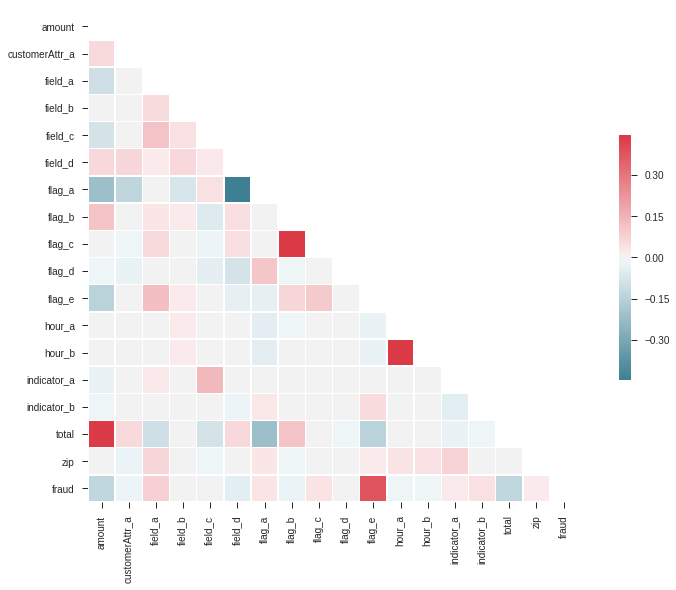

In [137]:
corr = data_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

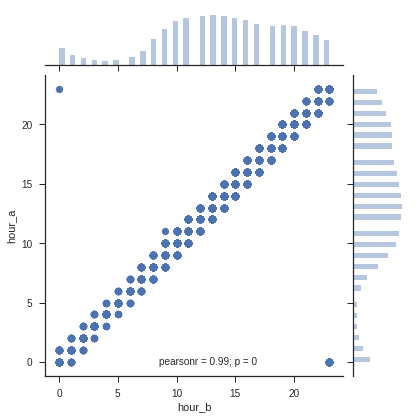

In [138]:
sns.jointplot(x="hour_b", y="hour_a", data=data_df)

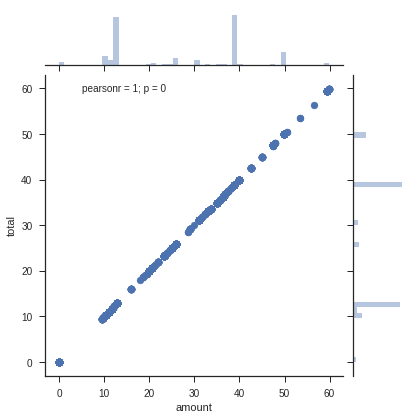

In [139]:
sns.jointplot(x="amount", y="total", data=data_df)

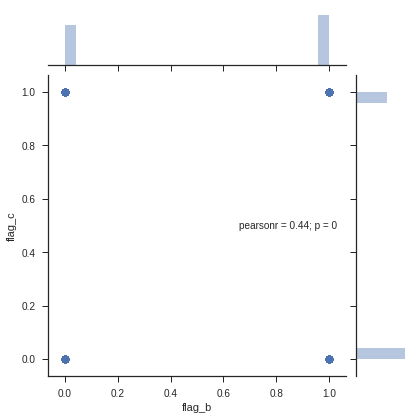

In [140]:
sns.jointplot(x="flag_b", y="flag_c", data=data_df)

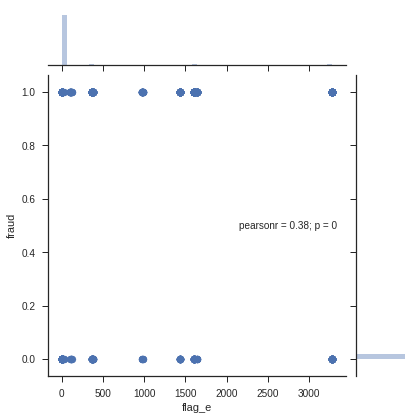

In [141]:
sns.jointplot(x="flag_e", y="fraud", data=data_df)

In [142]:
combined_df = train_df.append(test_df)
combined_df.reset_index(inplace=True)
combined_df.drop('index', inplace=True, axis=1)

In [143]:
def check_isnull(dataframe, columns):
    df = pd.isnull(dataframe)

    for column in columns:
        if len(df.groupby(column).size()) == 1:
            yield {column: False}
        else:
            yield {column: True}

# check missing values in train data
for col in check_isnull(combined_df, ['amount', 'zip', 'state', 'total', 'customerAttr_a', 'customerAttr_b', 'field_a',
                                   'field_b', 'field_c', 'field_d', 'hour_a', 'hour_b', 'flag_a', 'flag_b', 'flag_c',
                                   'flag_d', 'flag_e', 'indicator_a', 'indicator_b']):
    print(col)

{'amount': False}
{'zip': False}
{'state': True}
{'total': False}
{'customerAttr_a': False}
{'customerAttr_b': False}
{'field_a': False}
{'field_b': False}
{'field_c': False}
{'field_d': False}
{'hour_a': False}
{'hour_b': False}
{'flag_a': False}
{'flag_b': False}
{'flag_c': False}
{'flag_d': False}
{'flag_e': False}
{'indicator_a': False}
{'indicator_b': False}


In [144]:
# impute missing value with the most frequent state
combined_df['state'] = combined_df['state'].fillna('CA')

In [145]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
amount            150000 non-null float64
customerAttr_a    150000 non-null int64
customerAttr_b    150000 non-null object
field_a           150000 non-null int64
field_b           150000 non-null int64
field_c           150000 non-null int64
field_d           150000 non-null int64
flag_a            150000 non-null int64
flag_b            150000 non-null int64
flag_c            150000 non-null int64
flag_d            150000 non-null int64
flag_e            150000 non-null int64
hour_a            150000 non-null int64
hour_b            150000 non-null int64
indicator_a       150000 non-null int64
indicator_b       150000 non-null int64
state             150000 non-null object
total             150000 non-null float64
zip               150000 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 21.7+ MB


In [146]:
def process_state(combined):
    state_dummies = pd.get_dummies(combined['state'], prefix="state")
    combined = pd.concat([combined, state_dummies], axis=1)
    # removing "Pclass"
    combined.drop('state', axis=1, inplace=True)
    return combined

combined_df = process_state(combined_df)

In [147]:
combined_df.drop(['customerAttr_b', 'amount', 'hour_b'], axis=1, inplace=True)

In [148]:
def recover_train_test(combined):
    train = combined.ix[0:train_df.shape[0]-1]
    test = combined.ix[train_df.shape[0]:]

    return train, test

train_df, test_df = recover_train_test(combined_df)

In [149]:
from sklearn.metrics import classification_report, precision_score, recall_score


def describe(target_true, target_pred):
    report = classification_report(target_true, target_pred)
    print()
    print('classification report')
    print(report)
    precision = precision_score(target_true, target_pred)
    print('precision score')
    print(precision)
    recall = recall_score(target_true, target_pred)
    print('recall score')
    print(recall)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import xgboost as xgb

/home/siavash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, label, test_size=0.3)

In [164]:
clf = DecisionTreeClassifier()

parameter_grid = {
    'max_depth': [10, 15, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [{0: 1., 1: 2}, {0: 1., 1: 4}, {0: 1., 1: 8}, 'balanced', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(train_df, label.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.4512376994589725
Best parameters: {'class_weight': {0: 1.0, 1: 4}, 'criterion': 'gini', 'max_depth': 15, 'max_features': None}


In [165]:
clf = DecisionTreeClassifier(max_depth=15, class_weight={0: 1., 1: 4})
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
describe(y_test, y_pred)


classification report
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     29226
          1       0.58      0.43      0.49       774

avg / total       0.97      0.98      0.98     30000

precision score
0.579130434783
recall score
0.43023255814


In [4]:
clf = MLPClassifier()

parameter_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.0003, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(train_df, label.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
clf = MLPClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
describe(y_test, y_pred)

In [ ]:
clf = LogisticRegression()

parameter_grid = {
    'penalty': ['l1', 'l2'],
    'class_weight': [{0: 1., 1: 2}, {0: 1., 1: 4}, {0: 1., 1: 8}, 'balanced', None],
    'max_iter': [100, 200, 500, 800, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'multi_class': ['ovr', 'multinomial'],
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(train_df, label.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
describe(y_test, y_pred)

In [ ]:
clf = RandomForestClassifier()

parameter_grid = {
    'max_depth': [10, 15, 20, 50, 100],
    'n_estimators': [100, 200, 400, 500, 600],
    'criterion': ['gini', 'entropy']
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(train_df, label.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [25]:
forest = RandomForestClassifier(max_depth=50, n_estimators=400)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
describe(y_test, y_pred)


classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29226
          1       0.80      0.42      0.55       774

avg / total       0.98      0.98      0.98     30000

precision score
0.795620437956
recall score
0.422480620155


In [19]:
gbm = xgb.XGBClassifier()

parameter_grid = {
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'max_depth': [1, 4, 5, 7, 10],
    'reg_lambda': [0.01, 0.03, 0.1, 0.2, 0.5],
    'n_estimators': [60, 120, 240],
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(gbm,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1',
                           n_jobs=3)

grid_search.fit(X_train, y_train.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/home/siavash/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Best score: 0.5677635890077481
Best parameters: {'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 240, 'reg_lambda': 0.01}


In [118]:
gbm = xgb.XGBClassifier(max_depth=10, n_estimators=210, reg_lambda=0.01, learning_rate=0.3)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
describe(y_test, y_pred)


classification report
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     29226
          1       0.79      0.48      0.59       774

avg / total       0.98      0.98      0.98     30000

precision score
0.789699570815
recall score
0.475452196382


In [121]:
import math
from sklearn.utils import shuffle


def split_abundant_target(data_df, ratio):
    data_df = shuffle(data_df)
    part_size = math.ceil(data_df.shape[0] / ratio)
    for i in range(0, ratio):
        yield data_df[i * part_size:min((i + 1) * part_size, data_df.shape[0])]

        
def data_target(data, target_name):
    data = data.astype('float32')
    target = data[target_name]
    data = data.drop(target_name, axis=1)
    return data, target

In [124]:
data_df = pd.concat([train_df, label], axis=1)

one_df = data_df[data_df['fraud'] == 1]
zero_df = data_df[data_df['fraud'] == 0]
class_ratio = round(zero_df.shape[0] / one_df.shape[0])
class_ratio

for zero_df in split_abundant_target(zero_df, class_ratio):
    data, target = data_target(pd.concat([one_df, zero_df]), 'fraud')

    X_train, X_test, y_train, y_test = train_test_split(train_df, label, test_size=0.3)

    forest = RandomForestClassifier(max_features='sqrt', max_depth=8, n_estimators=210)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    describe(y_test, y_pred)


classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29215
          1       0.82      0.25      0.38       785

avg / total       0.98      0.98      0.97     30000

precision score
0.824786324786
recall score
0.245859872611



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29254
          1       0.84      0.26      0.39       746

avg / total       0.98      0.98      0.98     30000

precision score
0.842105263158
recall score
0.257372654155



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29212
          1       0.79      0.25      0.38       788

avg / total       0.98      0.98      0.97     30000

precision score
0.791164658635
recall score
0.25



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29147
          1       0.81      0.26      0.40       853

avg / total       0.97      0.98      0.97     30000

precision score
0.807142857143
recall score
0.264947245018



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29182
          1       0.83      0.23      0.37       818

avg / total       0.97      0.98      0.97     30000

precision score
0.831168831169
recall score
0.234718826406



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29183
          1       0.80      0.26      0.40       817

avg / total       0.97      0.98      0.97     30000

precision score
0.802973977695
recall score
0.264381884945



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29206
          1       0.82      0.25      0.38       794

avg / total       0.98      0.98      0.97     30000

precision score
0.822314049587
recall score
0.250629722922



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29153
          1       0.84      0.29      0.43       847

avg / total       0.98      0.98      0.97     30000

precision score
0.842465753425
recall score
0.290436835891



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29203
          1       0.81      0.26      0.40       797

avg / total       0.98      0.98      0.97     30000

precision score
0.811538461538
recall score
0.264742785445



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29205
          1       0.84      0.27      0.41       795

avg / total       0.98      0.98      0.97     30000

precision score
0.844621513944
recall score
0.266666666667



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29237
          1       0.77      0.25      0.38       763

avg / total       0.98      0.98      0.97     30000

precision score
0.766798418972
recall score
0.254259501966



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29202
          1       0.79      0.25      0.38       798

avg / total       0.97      0.98      0.97     30000

precision score
0.789682539683
recall score
0.249373433584



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29210
          1       0.80      0.25      0.38       790

avg / total       0.98      0.98      0.97     30000

precision score
0.803278688525
recall score
0.248101265823



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29198
          1       0.81      0.25      0.39       802

avg / total       0.98      0.98      0.97     30000

precision score
0.812749003984
recall score
0.254364089776



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29211
          1       0.81      0.26      0.40       789

avg / total       0.98      0.98      0.97     30000

precision score
0.80694980695
recall score
0.264892268695



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29207
          1       0.83      0.26      0.40       793

avg / total       0.98      0.98      0.97     30000

precision score
0.834008097166
recall score
0.259773013871



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29183
          1       0.83      0.26      0.40       817

avg / total       0.98      0.98      0.97     30000

precision score
0.825581395349
recall score
0.260709914321



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29224
          1       0.83      0.28      0.41       776

avg / total       0.98      0.98      0.97     30000

precision score
0.829457364341
recall score
0.275773195876



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29219
          1       0.83      0.25      0.39       781

avg / total       0.98      0.98      0.97     30000

precision score
0.831223628692
recall score
0.252240717029



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29200
          1       0.80      0.24      0.37       800

avg / total       0.97      0.98      0.97     30000

precision score
0.799163179916
recall score
0.23875



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29181
          1       0.83      0.26      0.40       819

avg / total       0.98      0.98      0.97     30000

precision score
0.826254826255
recall score
0.261294261294



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29179
          1       0.82      0.27      0.41       821

avg / total       0.98      0.98      0.97     30000

precision score
0.821167883212
recall score
0.274056029233



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29169
          1       0.79      0.24      0.37       831

avg / total       0.97      0.98      0.97     30000

precision score
0.792156862745
recall score
0.243080625752



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29159
          1       0.80      0.26      0.40       841

avg / total       0.97      0.98      0.97     30000

precision score
0.797833935018
recall score
0.262782401902



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29189
          1       0.84      0.26      0.40       811

avg / total       0.98      0.98      0.97     30000

precision score
0.835294117647
recall score
0.262638717633



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29240
          1       0.79      0.26      0.39       760

avg / total       0.98      0.98      0.97     30000

precision score
0.79435483871
recall score
0.259210526316



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29223
          1       0.80      0.27      0.41       777

avg / total       0.98      0.98      0.97     30000

precision score
0.803773584906
recall score
0.274131274131



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29210
          1       0.82      0.26      0.39       790

avg / total       0.98      0.98      0.97     30000

precision score
0.816733067729
recall score
0.259493670886



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29207
          1       0.78      0.24      0.37       793

avg / total       0.97      0.98      0.97     30000

precision score
0.784232365145
recall score
0.238335435057



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29152
          1       0.83      0.27      0.40       848

avg / total       0.97      0.98      0.97     30000

precision score
0.833948339483
recall score
0.266509433962



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29187
          1       0.82      0.25      0.39       813

avg / total       0.98      0.98      0.97     30000

precision score
0.824701195219
recall score
0.254612546125



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29206
          1       0.85      0.25      0.39       794

avg / total       0.98      0.98      0.97     30000

precision score
0.847457627119
recall score
0.251889168766



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29225
          1       0.81      0.27      0.41       775

avg / total       0.98      0.98      0.97     30000

precision score
0.814671814672
recall score
0.272258064516



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29222
          1       0.79      0.26      0.39       778

avg / total       0.98      0.98      0.97     30000

precision score
0.792828685259
recall score
0.255784061697



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29173
          1       0.80      0.25      0.38       827

avg / total       0.97      0.98      0.97     30000

precision score
0.8
recall score
0.251511487304



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29218
          1       0.87      0.27      0.41       782

avg / total       0.98      0.98      0.97     30000

precision score
0.873949579832
recall score
0.265984654731



classification report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     29178
          1       0.84      0.25      0.39       822

avg / total       0.98      0.98      0.97     30000

precision score
0.841463414634
recall score
0.251824817518
